In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transform
from matplotlib import pyplot
import numpy as np
import cv2
import scipy.io as sci
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling2D, Conv2D, MaxPool1D, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [3]:
test_images.shape

(10000, 32, 32, 3)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=50,batch_size=64, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
782/782 [==============================] - 229s 291ms/step - loss: 1.9265 - accuracy: 0.2887 - val_loss: 1.2192 - val_accuracy: 0.5577
Epoch 2/50
782/782 [==============================] - 227s 290ms/step - loss: 1.2586 - accuracy: 0.5506 - val_loss: 0.9697 - val_accuracy: 0.6641
Epoch 3/50
782/782 [==============================] - 229s 293ms/step - loss: 1.0033 - accuracy: 0.6501 - val_loss: 0.8644 - val_accuracy: 0.7000
Epoch 4/50
782/782 [==============================] - 232s 297ms/step - loss: 0.8525 - accuracy: 0.7005 - val_loss: 0.7619 - val_accuracy: 0.7360
Epoch 5/50
782/782 [==============================] - 238s 305ms/step - loss: 0.7708 - accuracy: 0.7284 - val_loss: 0.7325 - val_accuracy: 0.7476
Epoch 6/50
782/782 [==============================] - 242s 309ms/step - loss: 0.7081 - accuracy: 0.7562 - val_loss: 0.6821 - val_accuracy: 0.7636
Epoch 7/50
782/782 [==============================] - 240s 307ms/step - loss: 0.6440 - accuracy: 0.7771 - val_loss: 0.6489 -

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 12s 37ms/step - loss: 0.6764 - accuracy: 0.8190


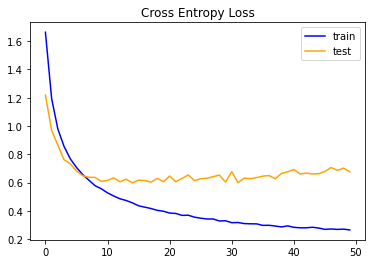

<Figure size 720x720 with 0 Axes>

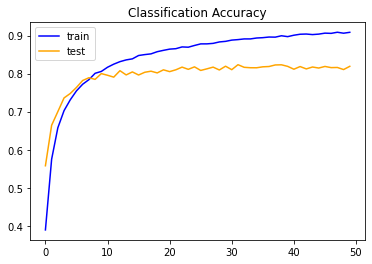

<Figure size 720x720 with 0 Axes>

In [22]:
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
g = plt.figure()
g.set_figwidth(10)
g.set_figheight(10)
pyplot.show()
# plot accuracy
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
# save plot to file
pyplot.show()
pyplot.close()